In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

### GPU Issues

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
import tensorflow as tf
from tensorflow.python.compiler.mlcompute import mlcompute

tf.compat.v1.disable_eager_execution()
mlcompute.set_mlc_device(device_name='gpu')
print("is_apple_mlc_enabled %s" % mlcompute.is_apple_mlc_enabled())
print("is_tf_compiled_with_apple_mlc %s" % mlcompute.is_tf_compiled_with_apple_mlc())
print(f"eagerly? {tf.executing_eagerly()}")
print(tf.config.list_logical_devices())

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
tf.__version__

In [ ]:
keras.__version__

## Load Data

In [2]:
DIR = ('/Users/allankapoor/Documents/Springboard/structure_damage/')
train_path = os.path.join(DIR, 'data', 'train_another')
val_path = os.path.join(DIR, 'data', 'validation_another')
test_path = os.path.join(DIR, 'data', 'test_another')

In [3]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.
Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


## Image Augmentation

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

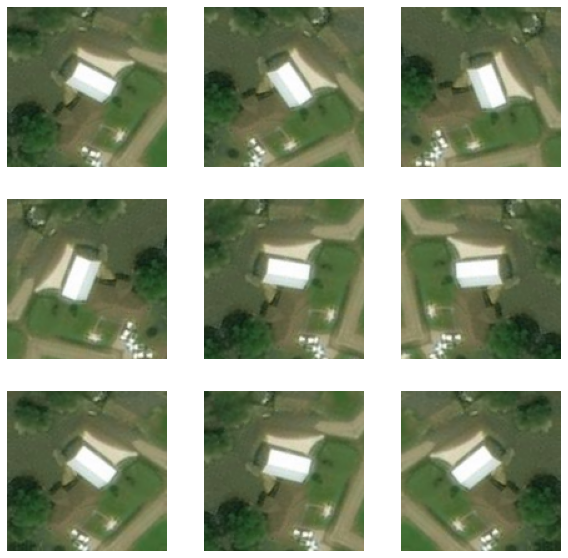

In [34]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [4]:
# buffered prefetching (?)
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

## Basic/Benchmark Model

As an initial benchmark, first I train a simple CNN within 3 convolution layers and 3 dense layers.

This model acheives an accuracy of XX, showing that the approach has promise.

However, it is overfitting 

In [7]:
# create model
model = Sequential()

# scaling (is this included? Want to normalize before first convolution layer)
model.add(Rescaling(1.0 / 255))

# convolution layers
model.add(Conv2D(32, kernel_size=5, strides=2, padding="same", input_shape=(128,128,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(Conv2D(64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

model.add(Conv2D(64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Activation("relu"))

# flatten
model.add(Flatten())

# dense layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [9]:
# Fit the model
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-11-26 15:52:23.010129: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-26 15:52:23.011616: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - ETA: 0s - loss: 12.0086 - accuracy: 0.6947WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x13fc3fdc0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - 111s 432ms/step - loss: 11.9783 - accuracy: 0.6951 - val_loss: 3.0568 - val_accuracy: 0.4900

250/250 [==============================] - 108s 430ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 0.3094 - val_accuracy: 0.9485


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0

In [13]:
model.save(os.path.join(DIR,'models','benchmark_26-11-20'))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/Users/allankapoor/miniforge3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
2021-11-26 17:37:35.467933: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
/Users/allankapoor/miniforge3/envs/tf_env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1397: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /Users/allankapoor/Documents/Springboard/structure_damage/models/benchmark_26-11-20/assets


In [21]:
results = model.evaluate(val_ds, batch_size=128)
print("test loss, test acc:", results)

63/63 [==============================] - 9s 144ms/step - loss: 0.3094 - accuracy: 0.9485
test loss, test acc: [0.3093571066856384, 0.9484999775886536]


In [64]:
model.history.history

{}

## Model 2: Max Pooling and Dropout Layers

Here I add additional layers to the model, hoping to both speed up model training and reduce overfitting.

 * **Max Pooling layers** after each convolution layer downsample the convolution outputs. This speeds up training (because the resolution is lower) and also reduces overfitting (by reducing sensitivity to the exact location of features in an image)
 * **Drop layers** after each dense layer randomly drop out nodes during training. This reduces overfitting by simulating training slightly different architectures. I increased the number of nodes in the dense layers vs the previous model because the drop out layers will remove some of them.

In [88]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras import Input

In [55]:
def generate_model2(input_shape, num_classes):
    
    '''CNN model architecture with max pooling + dropout layers'''
    
    inputs = Input(shape=input_shape)
    
    # Image augmentation
    #x = data_augmentation(inputs)
    # rescaling
    x = Rescaling(1.0 / 255)(inputs)
    
    # convolution (with max pooling)
    x = Conv2D(32, kernel_size=5, strides=2, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Conv2D(64, kernel_size=3, strides=2, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    #flatten
    x = Flatten()(x)
    
    #dense layers (with dropout to avoid overfitting)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    
    # output layer
    output = Dense(2, activation='softmax')(x)
    
    mod = Model(inputs=inputs, outputs=output)
    
    return mod

In [56]:
epochs = 50
callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

# Instantiate model
model2 = generate_model2(input_shape=(128,128,3), num_classes=2)

# Compile model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [65]:
# train model
model2_fit = model2.fit(train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds)

Epoch 1/50
250/250 [==============================] - 13s 52ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 1.7583 - val_accuracy: 0.7200
Epoch 2/50
250/250 [==============================] - 13s 52ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 1.6126 - val_accuracy: 0.7735
Epoch 3/50
250/250 [==============================] - 15s 59ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.3873 - val_accuracy: 0.9565
Epoch 4/50
250/250 [==============================] - 13s 51ms/step - loss: 0.0118 - accuracy: 0.9967 - val_loss: 0.3351 - val_accuracy: 0.9460
Epoch 5/50
250/250 [==============================] - 13s 51ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.3368 - val_accuracy: 0.9595
Epoch 6/50
250/250 [==============================] - 13s 52ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.2337 - val_accuracy: 0.9420
Epoch 7/50
250/250 [==============================] - 13s 52ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.5663 - val_accuracy:

In [66]:
# evaluate on validation data
results = model2.evaluate(val_ds, batch_size=128)
print("test loss, test acc:", results)

63/63 [==============================] - 1s 10ms/step - loss: 0.3810 - accuracy: 0.9550
test loss, test acc: [0.38095811009407043, 0.9549999833106995]


In [75]:
def plot_nn_training(history):
    
    '''Given model training history, plots validation accuracy and loss'''
    
    # plot history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    # plot history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

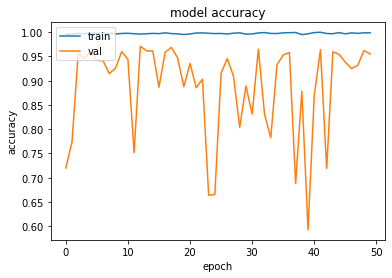

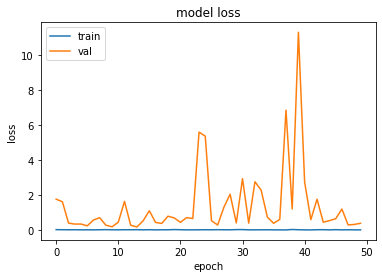

In [76]:
# plot model training history for model2
plot_nn_training(model2_fit)

## Transfer Learning Model


xView2 baseline model: https://github.com/DIUx-xView/xView2_baseline/blob/821d9f8b9201ee7952aef13b073c9fd38ce11d4b/model/model.py

In [82]:
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.applications.resnet50 import ResNet50

In [92]:
def generate_TL_model(input_shape, num_classes):
    
    weights = 'imagenet'
    inputs = Input(input_shape)

    #what does include_top=False remove?
    base_model = ResNet50(include_top=False, weights=weights, input_shape=(128, 128, 3))

    #freezing the resnet layers
    for layer in base_model.layers:
        layer.trainable = False

    #these convolution layers come before the resnet layers
    x = Conv2D(32, (5, 5), strides=2, padding='same', activation='relu', input_shape=(128, 128, 3))(inputs)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)

    x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)

    x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)

    x = Flatten()(x)

    base_resnet = base_model(inputs)
    base_resnet = Flatten()(base_resnet)

    concated_layers = Concatenate()([x, base_resnet])

    # dense layers come after the resnet layers
    # dropout to reduce overfit
    concated_layers = Dense(1024, activation='relu')(concated_layers)
    concated_layers = Dropout(0.3)(concated_layers)
    concated_layers = Dense(512, activation='relu')(concated_layers)
    concated_layers = Dropout(0.2)(concated_layers)
    concated_layers = Dense(256, activation='relu')(concated_layers)
    concated_layers = Dropout(0.1)(concated_layers)
    
    # output layer
    output = Dense(num_classes, activation='softmax')(concated_layers)

    mod = Model(inputs=inputs, outputs=output)
    
    return mod

In [93]:
epochs = 10
callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

# Instantiate model
TL_model = generate_TL_model(input_shape=(128,128,3), num_classes=2)

# Compile model
TL_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [94]:
# train model
TL_model_fit = TL_model.fit(train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - ETA: 0s - loss: 2.1673 - accuracy: 0.8213WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x42d1f9d30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT

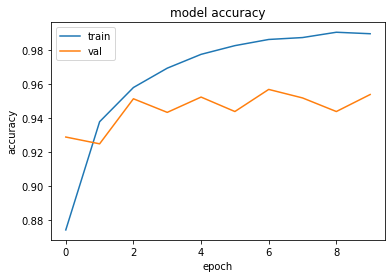

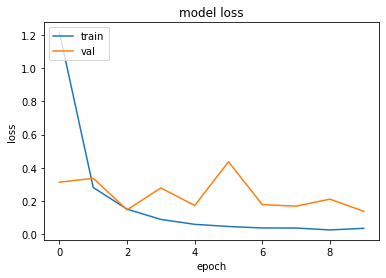

In [95]:
# plot model training history for TL_model
plot_nn_training(TL_model_fit)

# To Try

In [ ]:
#image generator

#flow


ImageDataGenerator > flow

flow_from_directory

#print architecture graphic
keras.utils.plot_model(model, show_shapes=True)

In [102]:
def generate_model2b(input_shape, num_classes):
    
    '''CNN model architecture with max pooling + dropout layers'''
    
    inputs = Input(shape=input_shape)
    
    # Image augmentation
    #x = data_augmentation(inputs)
    # rescaling
    x = Rescaling(1.0 / 255)(inputs)
    
    # convolution (with max pooling)
    x = Conv2D(32, kernel_size=5, strides=1, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(64, kernel_size=3, strides=1, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=1, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    x = Conv2D(64, kernel_size=3, strides=1, padding="same")(x)
    x = MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', data_format=None)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    #flatten
    x = Flatten()(x)
    
    #dense layers (with dropout to avoid overfitting)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    
    # output layer
    output = Dense(2, activation='softmax')(x)
    
    mod = Model(inputs=inputs, outputs=output)
    
    return mod

In [103]:
epochs = 20
callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5")]

# Instantiate model
model2b = generate_model2b(input_shape=(128,128,3), num_classes=2)

# Compile model
model2b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [104]:
# train model
model2_fit = model2b.fit(train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
250/250 [==============================] - ETA: 0s - loss: 3.7901 - accuracy: 0.7219WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x16ab15dc0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSIT